Practical Exercises

In [5]:
import pandas as pd


news = pd.read_csv("E:\\Desktop\\Machine Learning\\SBU Tasks\\exercise_2\\data\\OnlineNewsPopularity.csv")
news = news.drop('url', axis=1)

Performing exploratory data analysis on the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    timedelta                      39644 non-null  float64
 1    n_tokens_title                 39644 non-null  float64
 2    n_tokens_content               39644 non-null  float64
 3    n_unique_tokens                39644 non-null  float64
 4    n_non_stop_words               39644 non-null  float64
 5    n_non_stop_unique_tokens       39644 non-null  float64
 6    num_hrefs                      39644 non-null  float64
 7    num_self_hrefs                 39644 non-null  float64
 8    num_imgs                       39644 non-null  float64
 9    num_videos                     39644 non-null  float64
 10   average_token_length           39644 non-null  float64
 11   num_keywords                   39644 non-null  float64
 12   data_channel_is_lifestyle      

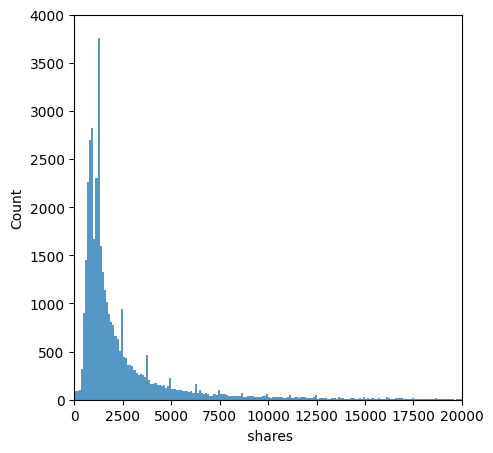

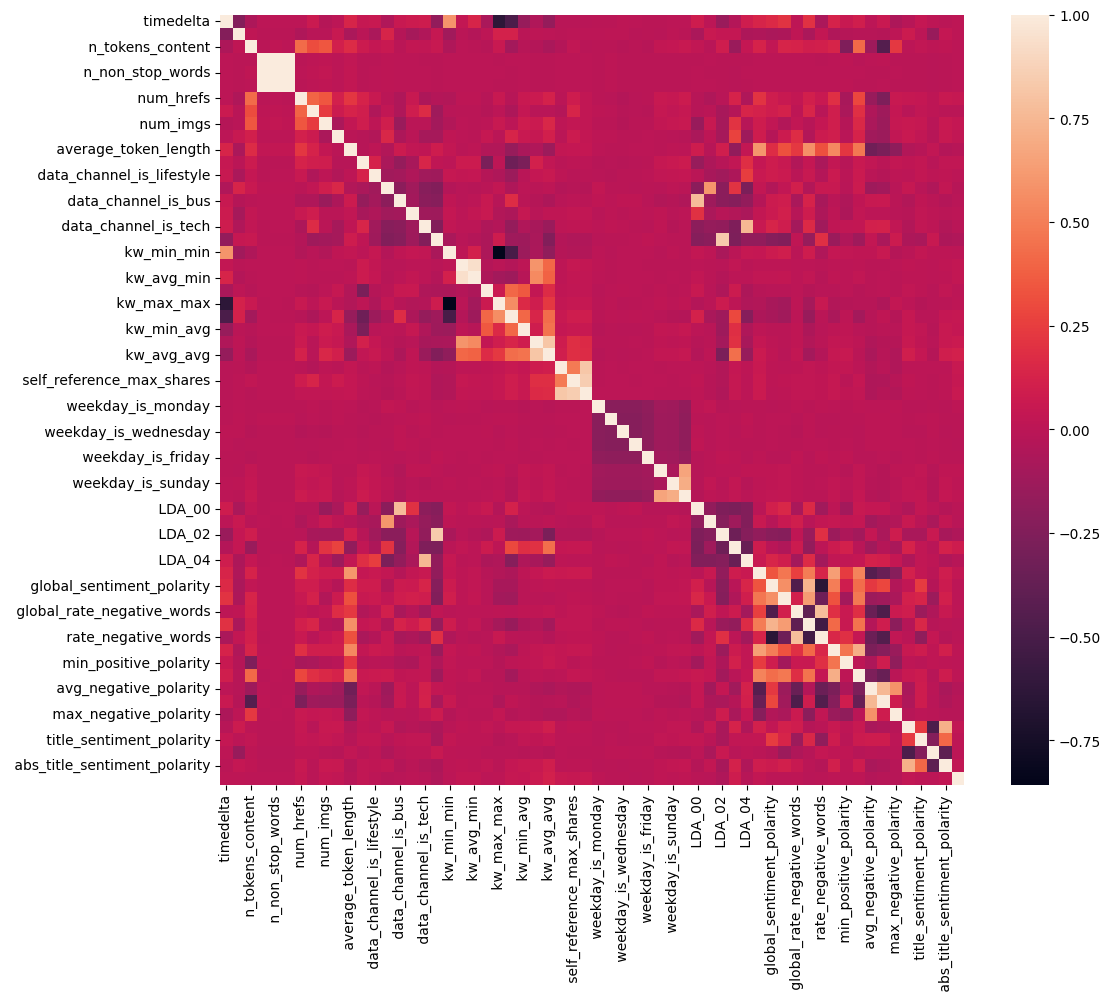

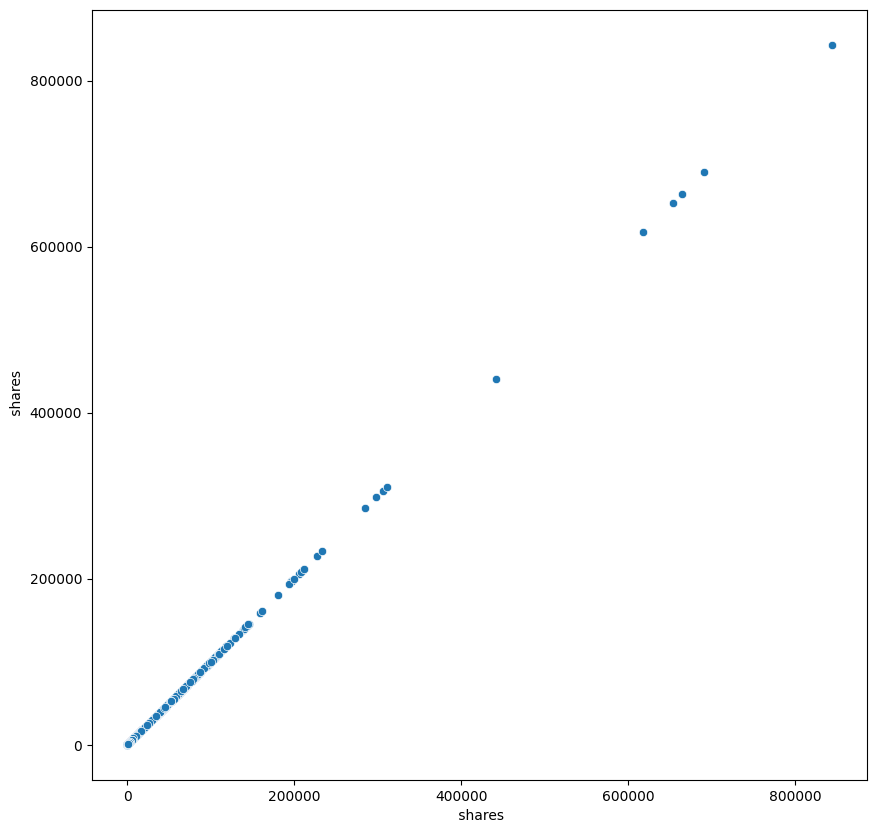

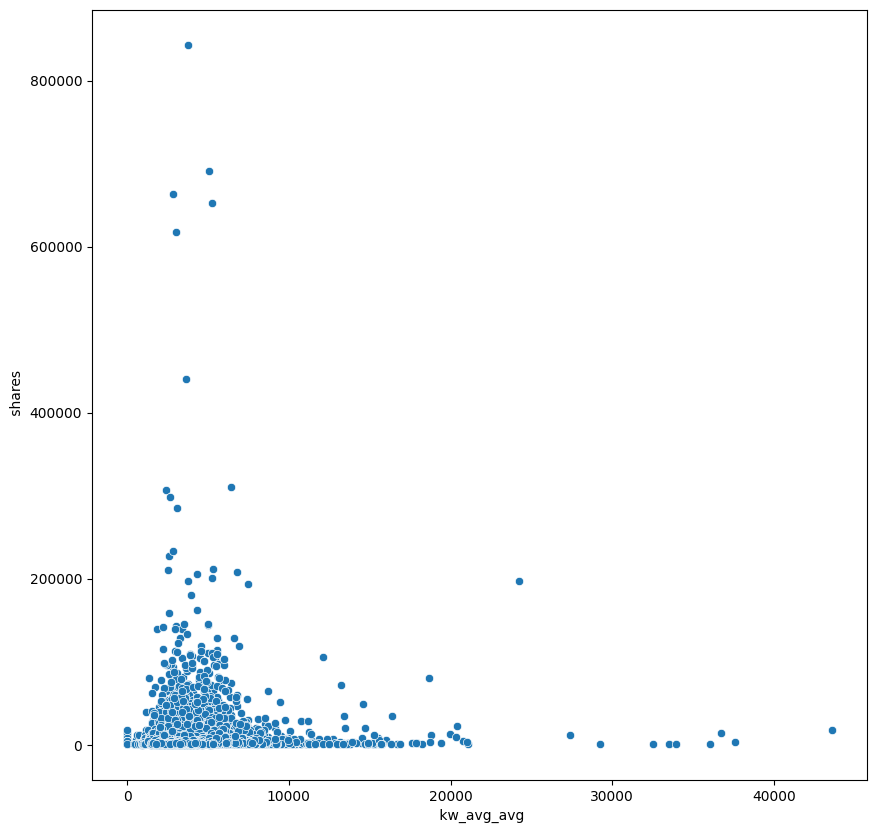

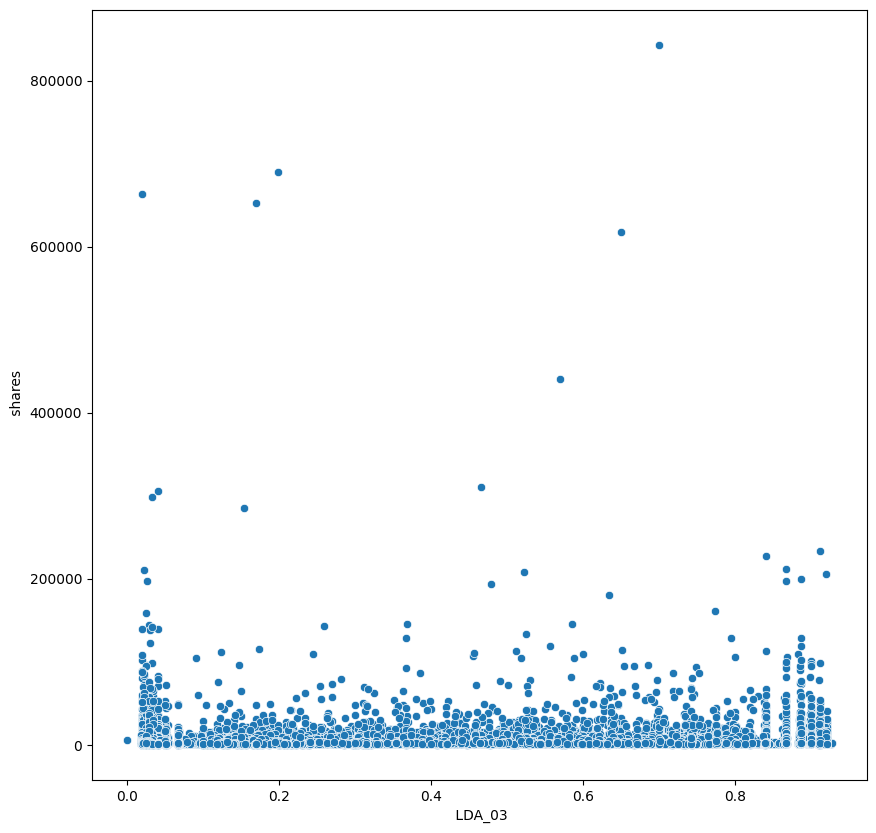

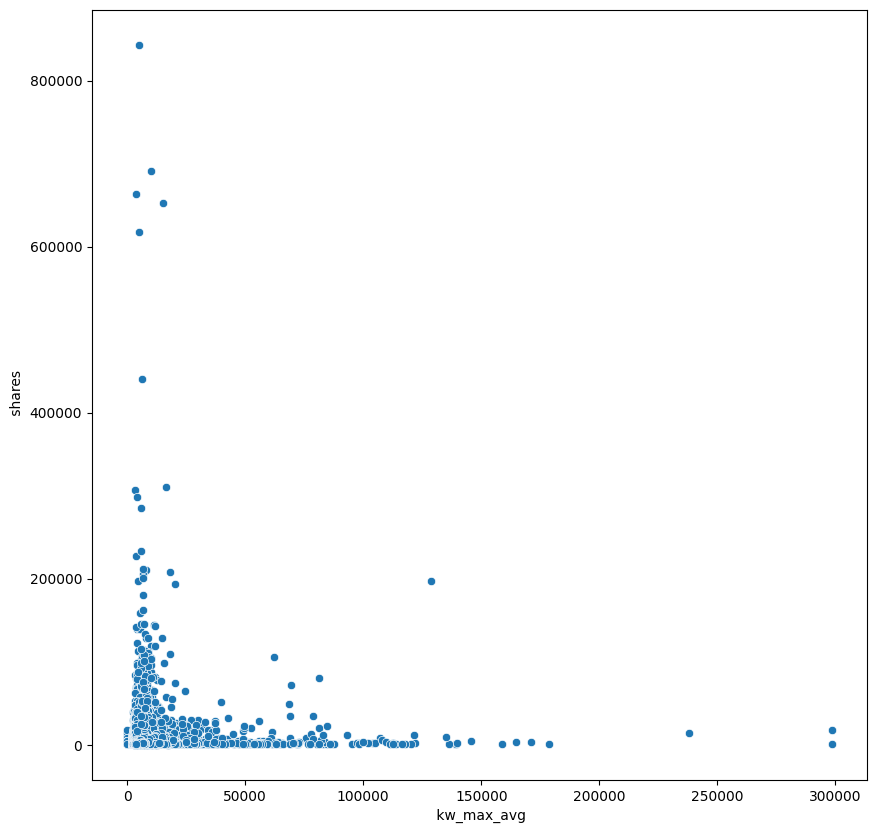

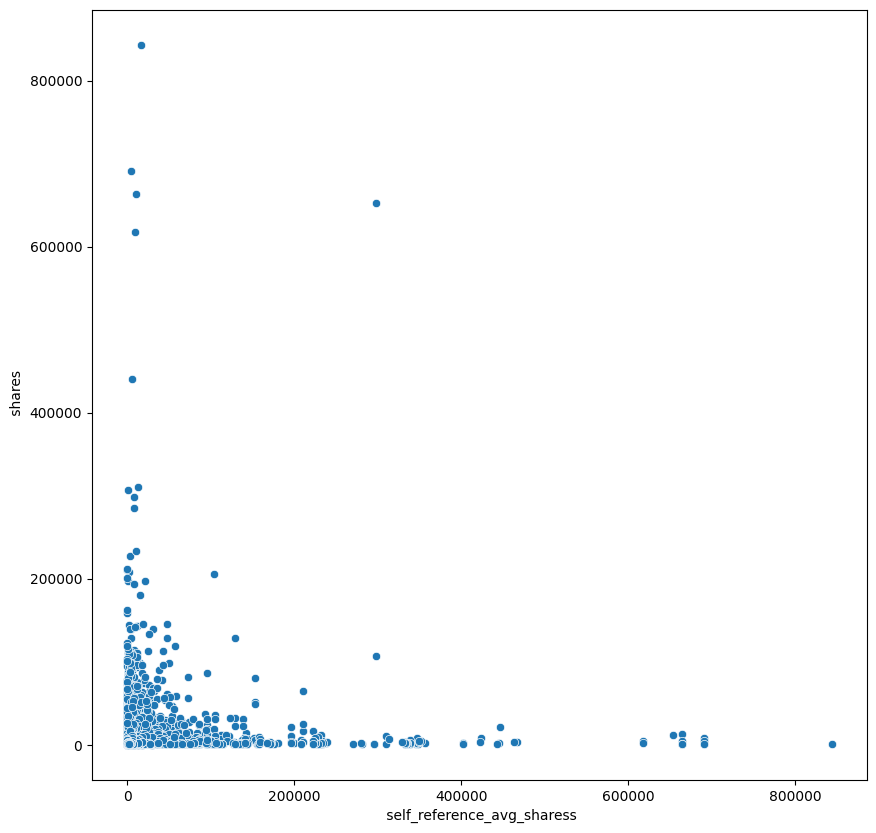

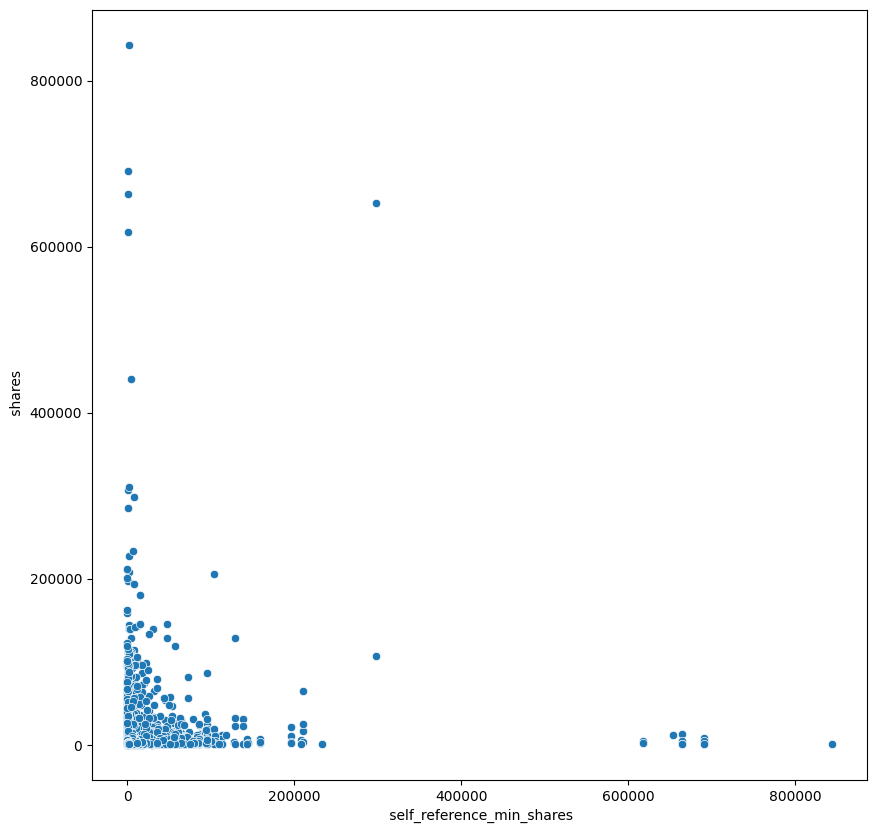

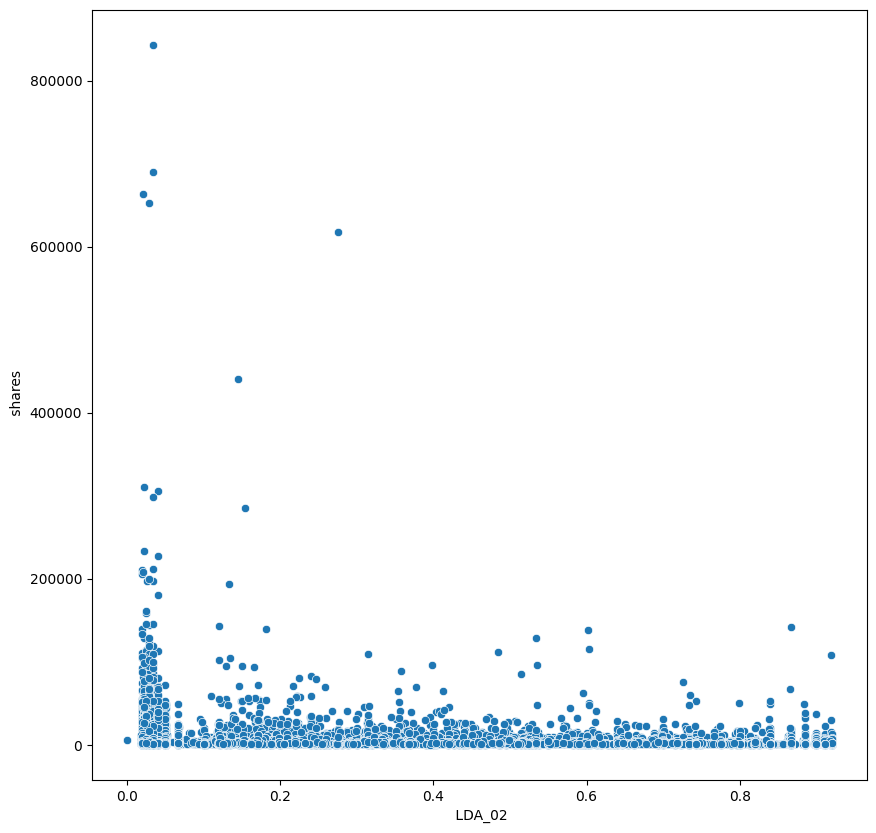

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


news.head()
news.shape
news.describe()
news.info()
news.isnull().sum()
news.columns


plt.figure(figsize=(5, 5))
sns.histplot(data=news[' shares'])
plt.ylim(0, 4000)
plt.xlim(0, 20000)
plt.show()


correlation = news.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation)
plt.show()


correlation_with_target = correlation[' shares'].sort_values(ascending=False)
correlation_with_target
strong_corr = correlation_with_target[(correlation_with_target > 0.05) | (correlation_with_target < -0.05)]
strong_corr


for feature in strong_corr.index:
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=news, x=feature, y=' shares')
    plt.show()


Hypothesis Tests:

In [7]:
from scipy.stats import pearsonr, ttest_1samp, ttest_ind


# Correlation Test

correlation, p_value = pearsonr(news[' shares'], news[' n_unique_tokens'])
correlation, p_value = pearsonr(news[' shares'], news[' n_tokens_content'])
correlation, p_value = pearsonr(news[' shares'], news[' timedelta'])


print(f"correlation test for shares , n_unique_tokens:\ncorrelation: {correlation}, p_value: {p_value}")
print(f"\ncorrelation test for shares , n_tokens_content:\ncorrelation: {correlation}, p_value: {p_value}")
print(f"\ncorrelation test for shares , timedelta:\ncorrelation: {correlation}, p_value: {p_value}")


# T-test test (1-sample)

t_stat, p_value = ttest_1samp(news[' shares'], 1500)


print(f"\nOne-Sample T-test for shares:\n{t_stat}, p_value = {p_value}")


# T-test test (2-sample)

t_stat, p_value = ttest_ind(news[' shares'], 1500)


print(f"\nTwo-Sample T-test for shares:\n{t_stat}, p_value = {p_value}")


correlation test for shares , n_unique_tokens:
correlation: 0.00866228771126255, p_value: 0.08457995577420306

correlation test for shares , n_tokens_content:
correlation: 0.00866228771126255, p_value: 0.08457995577420306

correlation test for shares , timedelta:
correlation: 0.00866228771126255, p_value: 0.08457995577420306

One-Sample T-test for shares:
32.45781171686787, p_value = 4.1317828863646634e-228

Two-Sample T-test for shares:
0.1630140455613019, p_value = 0.8705082067540546


Linear Regression:

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



linear_model = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(news.drop(' shares', axis=1), news[' shares'], test_size=0.2, random_state=42)
linear_model.fit(x_train, y_train)

predictions = linear_model.predict(x_test)


# measuring performance:

mean_absolute_error(y_test, predictions)
mean_squared_error(y_test, predictions)
r2_score(y_test, predictions)

0.026428511427813328

Ridge and Lasso Regression:

In [9]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Ridge

ridge_model = Ridge(max_iter=20)
ridge_model.fit(x_train, y_train)

ridge_pred = ridge_model.predict(x_test)

mean_absolute_error(y_test, ridge_pred)
mean_squared_error(y_test, ridge_pred)
r2_score(y_test, ridge_pred)


# Lasso

lasso_model = Lasso(max_iter=20)
lasso_model.fit(x_train, y_train)

lasso_pred = lasso_model.predict(x_test)

mean_absolute_error(y_test, lasso_pred)
mean_squared_error(y_test, lasso_pred)
r2_score(y_test, lasso_pred)


0.026043478449231494

Scaling methods:

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


# Standard Scaler

std_scaler = StandardScaler()
std_x_train = std_scaler.fit_transform(x_train)
std_x_test = std_scaler.transform(x_test)

linear_model_1 = LinearRegression()

linear_model_1.fit(std_x_train, y_train)

predictions_1 = linear_model_1.predict(std_x_test)

mean_absolute_error(y_test, predictions_1)
mean_squared_error(y_test, predictions_1)
r2_score(y_test, predictions_1)


# MinMax Scaler

min_max_scaler = MinMaxScaler()
mmscaled_x_train = min_max_scaler.fit_transform(x_train)
mmscaled_x_test = min_max_scaler.transform(x_test)

linear_model_2 = LinearRegression()

linear_model_2.fit(mmscaled_x_train, y_train)

predictions_2 = linear_model_2.predict(mmscaled_x_test)

mean_absolute_error(y_test, predictions_2)
mean_squared_error(y_test, predictions_2)
r2_score(y_test, predictions_2)


# Robust Scaler

rob_scaler = RobustScaler()
rob_x_train = rob_scaler.fit_transform(x_train)
rob_x_test = rob_scaler.transform(x_test)

linear_model_3 = LinearRegression()

linear_model_3.fit(rob_x_train, y_train)

predictions_3 = linear_model_3.predict(rob_x_test)

mean_absolute_error(y_test, predictions_3)
mean_squared_error(y_test, predictions_3)
r2_score(y_test, predictions_3)

0.026431406948009495

Polynomial Features:

In [11]:
from sklearn.preprocessing import PolynomialFeatures


generator = PolynomialFeatures(degree=2)
poly_x_train = generator.fit_transform(x_train)
poly_x_test = generator.transform(x_test)


polynomialfeatures_model = LinearRegression()
polynomialfeatures_model.fit(poly_x_train, y_train)
polynomialfeatures_predictions = polynomialfeatures_model.predict(poly_x_test)


mean_absolute_error(y_test, polynomialfeatures_predictions)
mean_squared_error(y_test, polynomialfeatures_predictions)
r2_score(y_test, polynomialfeatures_predictions)

-1151.807321066003

GridSearchCV and RandomizedSearchCV:

In [12]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np


randomized_search_cv = RandomizedSearchCV(ridge_model, param_distributions={'alpha': uniform(0.1, 10)}, cv=5)
randomized_search_cv.fit(x_train, y_train)
randomized_search_cv.best_params_


grid_search_cv = GridSearchCV(lasso_model, param_grid={'alpha': np.linspace(0.1, 10, 50)}, cv=5)
grid_search_cv.fit(x_train, y_train)
grid_search_cv.best_params_

{'alpha': np.float64(8.181632653061225)}

Absolute Error, Epsilon-sensitive error, Huber loss function

In [ ]:
def AbsoluteError(y, y_hat):
        return np.sum(np.abs(y_hat - y))


def EpsilonSensitiveError(y, y_hat, epsilon=0.1):
    return np.sum(np.maximum(0, np.abs(y_hat - y) - epsilon))


def HuberLoss(y, y_hat, delta=1.0):
    residual = np.abs(y_hat - y)
    loss = np.where(residual <= delta, 0.5 * (residual ** 2), delta * (residual - 0.5 * delta))
    return np.sum(loss)



linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
pred = linear_model.predict(x_test)


AbsoluteError(y_test, pred), EpsilonSensitiveError(y_test, pred), HuberLoss(y_test, pred)

(np.float64(23847971.027911067),
 np.float64(23847178.12791107),
 np.float64(23844006.527911067))